In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Assignment_3"

/content/drive/My Drive/Colab Notebooks/Assignment_3


In [5]:
dataset=pd.read_csv("bankdata.csv")
print(dataset)
dataset.info()

       age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  --

In [6]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
replace_job = {'job': {'admin.': 1, 'blue-collar': 2, 'technician': 3, 'services': 4,'management': 5, 'retired': 6, 'entrepreneur': 7 , 'self-employed': 8 , 'housemaid': 9,'unemployed': 10,'student': 11,'unknown': 12}}
dataset.replace(replace_job, inplace=True)

In [8]:
replace_marital = {'marital': {'married': 1, 'single': 2, 'divorced': 3, 'unknown': 4}}
dataset.replace(replace_marital, inplace=True)

In [9]:
replace_education = {'education': {'university.degree': 1, 'high.school': 2, 'basic.9y': 3, 'professional.course': 4,'basic.4y': 5, 'basic.6y': 6, 'unknown': 7, 'illiterate': 8}}
dataset.replace(replace_education, inplace=True)

In [10]:
replace_default = {'default': {'no': 1, 'unknown': 2, 'yes': 3}}
dataset.replace(replace_default, inplace=True)

In [11]:
replace_default = {'housing': {'no': 1, 'unknown': 2, 'yes': 3}}
dataset.replace(replace_default, inplace=True)

In [12]:
replace_default = {'loan': {'no': 1, 'unknown': 2, 'yes': 3}}
dataset.replace(replace_default, inplace=True)

In [13]:
replace_default = {'contact': {'cellular': 1, 'telephone': 2}}
dataset.replace(replace_default, inplace=True)

In [14]:
replace_default = {'month': {'jan': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'dec': 11, 'nov': 10}}
dataset.replace(replace_default, inplace=True)

In [15]:
replace_default = {'day_of_week': {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}}
dataset.replace(replace_default, inplace=True)

In [16]:
replace_default = {'poutcome': {'nonexistent': 1, 'failure': 2, 'success': 3}}
dataset.replace(replace_default, inplace=True)

In [17]:
replace_default = {'pdays': {999:0,3:1,6:1,4:1,9:1,2:1,7:1,12:1,10:1,5:1,13:1,11:1,1:1,15:1,14:1,8:1,16:1,17:1,18:1,19:1,20:1,21:1,22:1,25:1,26:1,27:1}}
dataset.replace(replace_default, inplace=True)

In [18]:
replace_default = {'y': {'yes': 1, 'no': 0}}
dataset.replace(replace_default, inplace=True)

In [19]:
dataset.shape

(41188, 21)

In [39]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [40]:
print(dataset['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64


In [41]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,1,5,1,1,1,2,4,1,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,4,1,2,2,1,1,2,4,1,149,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,4,1,2,1,3,1,2,4,1,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,6,1,1,1,2,4,1,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,4,1,2,1,1,3,2,4,1,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [42]:
pos,neg=(Y==1).reshape(41188,1),(Y==0).reshape(41188,1)

In [43]:
neg

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

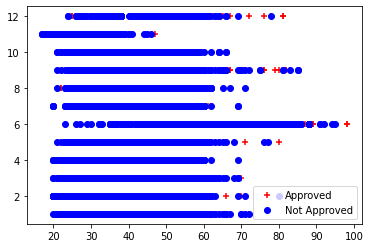

In [44]:
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")
plt.legend(["Approved","Not Approved"])

In [45]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [46]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std

In [47]:
def costfunction(theta,X,Y):
    m=len(Y)
    error=0
    for i in range(m):
        predictions=sigmoid(np.dot(X[i],theta))
        error=error+((Y[i]*np.log(predictions))-((1-Y[i])*np.log(1-predictions)))
    cost=1/m*error
    grad=1/m*np.dot(X.transpose(),(predictions-Y))  #X=(100,2)  prediction-y=(100,1)

    print(cost)
    return cost,grad

In [48]:
m,n=X.shape[0],X.shape[1]
X_Norm,X_mean,X_std=feature_normalization(X)
X=np.append(np.ones((m,1)),X_Norm,axis=1)
Y=Y.reshape(m,1)
initial_theta=np.zeros((n+1,1))
costfunction(initial_theta,X,Y)

[0.53697534]


(array([0.53697534]), array([[ 0.38734583],
        [-0.00961118],
        [-0.01765867],
        [-0.008316  ],
        [ 0.00847038],
        [ 0.03141202],
        [-0.00365229],
        [ 0.00155195],
        [ 0.04577284],
        [-0.01175735],
        [-0.00317772],
        [-0.12813525],
        [ 0.0209802 ],
        [-0.10213188],
        [-0.07277623],
        [-0.08548375],
        [ 0.09432427],
        [ 0.04306584],
        [-0.01735074],
        [ 0.09730796],
        [ 0.11213849]]))

In [49]:
def gradientDescent(X,Y,theta,alpha,num_iters):
  m=len(Y)
  cost_function_values=[]

  for i in range(num_iters):
    cost,grad=costfunction(theta,X,Y)
    cost_function_values.append(cost)
    theta=theta-(alpha*grad)

    if(i%10==0):
      plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")
      plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="o")
      x_value=np.array([np.min(X[:,1]),np.max(X[:,1])])
      y_value=-(theta[0]+theta[1]*x_value)/theta[2]
      plt.legend(["Approved","Not Approved"],loc=0)
      plt.plot(x_value,y_value,"g")
      
      plt.show()
  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("number of iteration")
  plt.ylabel("Cost/loss values")
  plt.title("cost Function curve")
  plt.show()
  return theta,cost_function_values

[0.53697534]


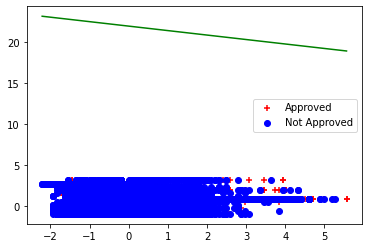

[0.53311789]
[0.5292735]
[0.5254425]
[0.52162525]
[0.51782209]
[0.51403336]
[0.51025938]
[0.5065005]
[0.50275703]
[0.49902929]


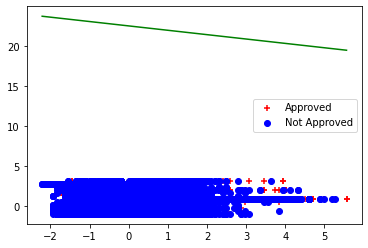

[0.49531759]
[0.49162224]
[0.48794355]
[0.48428181]
[0.4806373]
[0.47701032]
[0.47340115]
[0.46981004]
[0.46623729]
[0.46268313]


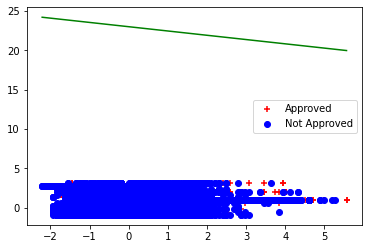

[0.45914783]
[0.45563163]
[0.45213477]
[0.44865749]
[0.44520002]
[0.44176257]
[0.43834535]
[0.43494859]
[0.43157247]
[0.42821719]


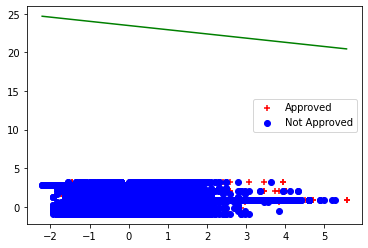

[0.42488293]
[0.42156987]
[0.41827819]
[0.41500804]
[0.4117596]
[0.408533]
[0.40532838]
[0.4021459]
[0.39898567]
[0.39584781]


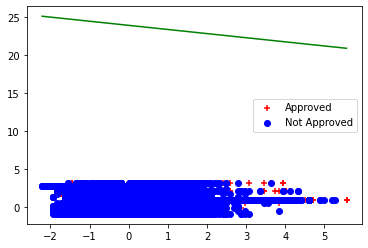

[0.39273245]
[0.38963968]
[0.38656961]
[0.38352234]
[0.38049794]
[0.3774965]
[0.37451809]
[0.37156278]
[0.36863062]
[0.36572166]


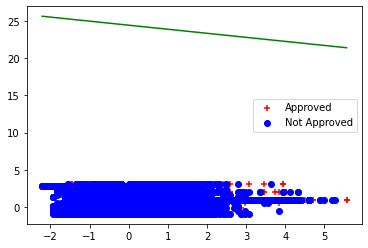

[0.36283596]
[0.35997355]
[0.35713446]
[0.35431871]
[0.35152633]
[0.34875733]
[0.34601172]
[0.34328949]
[0.34059064]
[0.33791516]


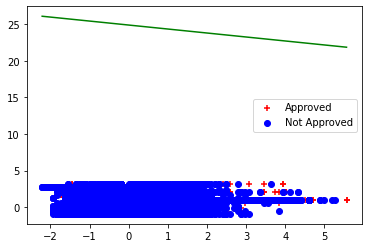

[0.33526303]
[0.33263422]
[0.33002872]
[0.32744647]
[0.32488744]
[0.32235159]
[0.31983887]
[0.31734921]
[0.31488256]
[0.31243886]


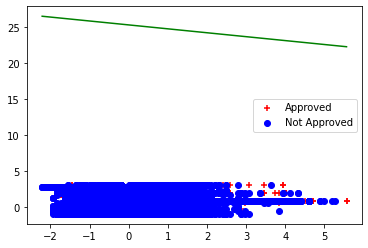

[0.31001802]
[0.30761997]
[0.30524464]
[0.30289194]
[0.30056177]
[0.29825405]
[0.29596868]
[0.29370556]
[0.29146457]
[0.28924562]


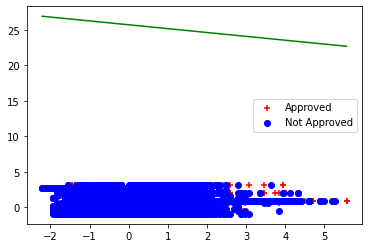

[0.28704858]
[0.28487335]
[0.2827198]
[0.2805878]
[0.27847724]
[0.27638798]
[0.27431989]
[0.27227284]
[0.27024668]
[0.26824127]


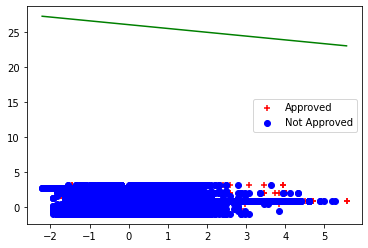

[0.26625648]
[0.26429216]
[0.26234815]
[0.26042432]
[0.2585205]
[0.25663654]
[0.2547723]
[0.2529276]
[0.25110229]
[0.24929621]


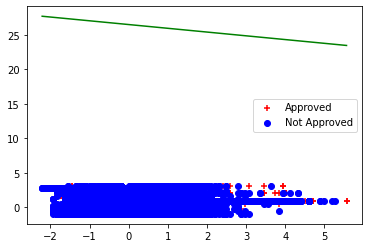

[0.2475092]
[0.24574109]
[0.24399173]
[0.24226093]
[0.24054854]
[0.23885439]
[0.23717831]
[0.23552013]
[0.23387967]
[0.23225678]


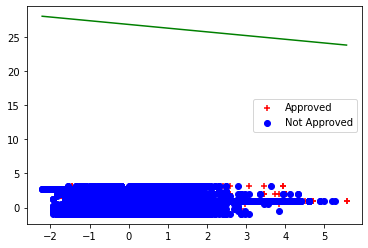

[0.23065127]
[0.22906297]
[0.22749172]
[0.22593733]
[0.22439964]
[0.22287848]
[0.22137366]
[0.21988501]
[0.21841237]
[0.21695556]


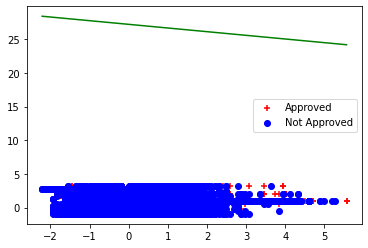

[0.21551441]
[0.21408873]
[0.21267837]
[0.21128314]
[0.20990289]
[0.20853742]
[0.20718658]
[0.20585019]
[0.20452808]
[0.20322009]


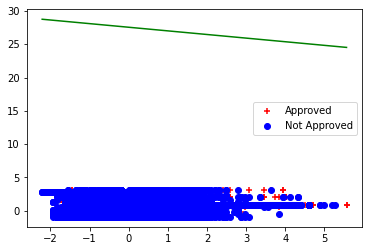

[0.20192604]
[0.20064577]
[0.19937911]
[0.19812589]
[0.19688595]
[0.19565913]
[0.19444525]
[0.19324416]
[0.19205569]
[0.19087969]


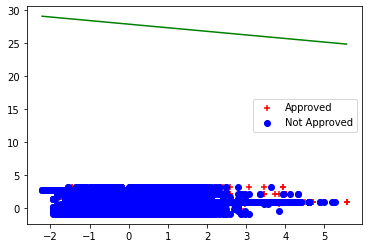

[0.189716]
[0.18856445]
[0.18742488]
[0.18629715]
[0.18518109]
[0.18407656]
[0.18298339]
[0.18190144]
[0.18083056]
[0.1797706]


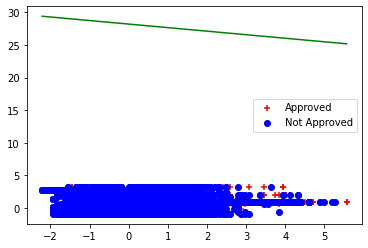

[0.1787214]
[0.17768282]
[0.17665472]
[0.17563695]
[0.17462937]
[0.17363184]
[0.17264421]
[0.17166636]
[0.17069813]
[0.16973939]


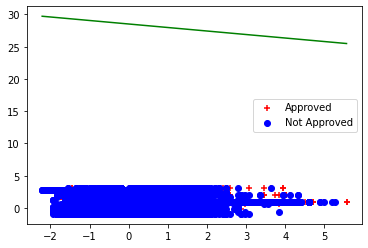

[0.16879001]
[0.16784986]
[0.1669188]
[0.1659967]
[0.16508344]
[0.16417888]
[0.16328289]
[0.16239536]
[0.16151616]
[0.16064516]


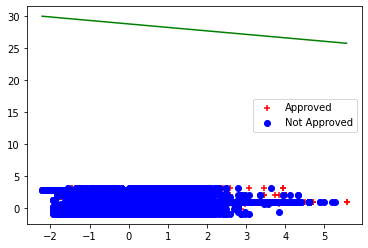

[0.15978224]
[0.15892729]
[0.15808019]
[0.15724081]
[0.15640905]
[0.15558479]
[0.15476791]
[0.15395831]
[0.15315587]
[0.15236049]


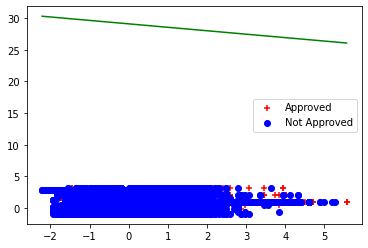

[0.15157205]
[0.15079046]
[0.1500156]
[0.14924738]
[0.14848568]
[0.14773042]
[0.14698149]
[0.14623879]
[0.14550223]
[0.1447717]


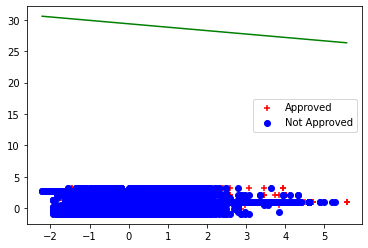

[0.14404712]
[0.14332839]
[0.14261543]
[0.14190813]
[0.14120641]
[0.14051018]
[0.13981936]
[0.13913386]
[0.13845359]
[0.13777847]


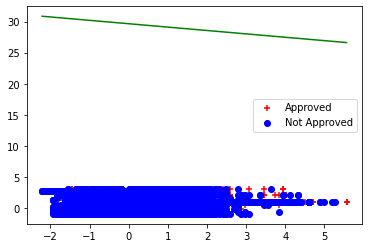

[0.13710842]
[0.13644336]
[0.1357832]
[0.13512788]
[0.1344773]
[0.1338314]
[0.1331901]
[0.13255333]
[0.131921]
[0.13129306]


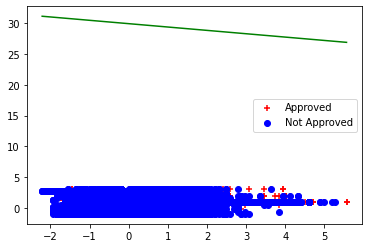

[0.13066942]
[0.13005002]
[0.12943479]
[0.12882366]
[0.12821657]
[0.12761344]
[0.12701422]
[0.12641883]
[0.12582723]
[0.12523933]


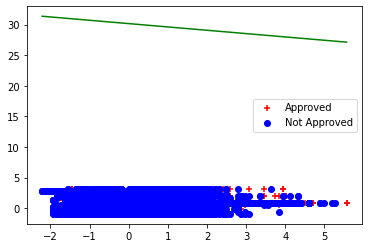

[0.12465509]
[0.12407444]
[0.12349732]
[0.12292368]
[0.12235345]
[0.12178659]
[0.12122303]
[0.12066272]
[0.12010561]
[0.11955163]


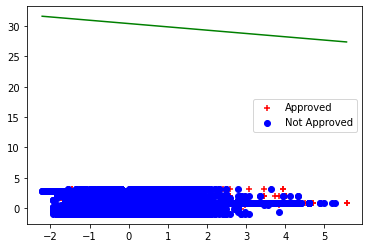

[0.11900075]
[0.11845291]
[0.11790806]
[0.11736614]
[0.11682712]
[0.11629093]
[0.11575754]
[0.1152269]
[0.11469895]
[0.11417366]


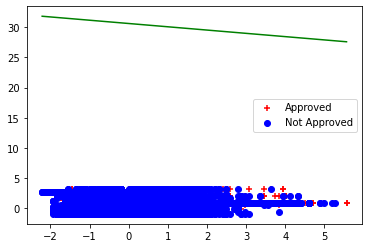

[0.11365098]
[0.11313087]
[0.11261328]
[0.11209817]
[0.1115855]
[0.11107523]
[0.11056732]
[0.11006172]
[0.1095584]
[0.10905733]


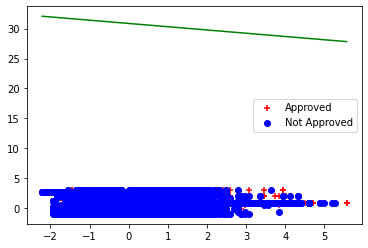

[0.10855845]
[0.10806174]
[0.10756716]
[0.10707467]
[0.10658423]
[0.10609582]
[0.1056094]
[0.10512492]
[0.10464237]
[0.10416171]


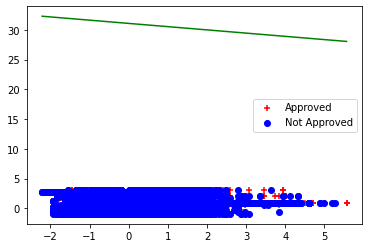

[0.1036829]
[0.10320592]
[0.10273073]
[0.1022573]
[0.1017856]
[0.10131561]
[0.10084729]
[0.10038061]
[0.09991555]
[0.09945209]


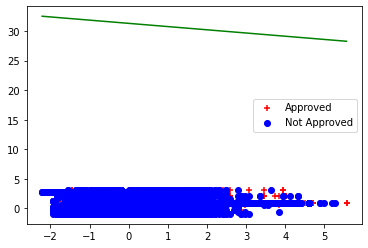

[0.09899018]
[0.09852981]
[0.09807095]
[0.09761357]
[0.09715765]
[0.09670316]
[0.09625008]
[0.09579839]
[0.09534805]
[0.09489905]


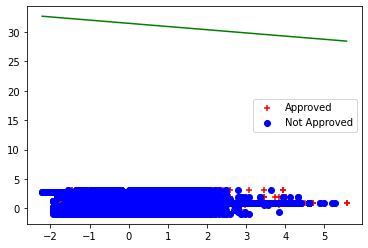

[0.09445137]
[0.09400498]
[0.09355986]
[0.09311598]
[0.09267333]
[0.09223189]
[0.09179163]
[0.09135253]
[0.09091458]
[0.09047775]


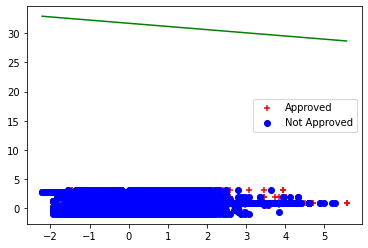

[0.09004203]
[0.08960739]
[0.08917382]
[0.08874129]
[0.0883098]
[0.08787932]
[0.08744983]
[0.08702132]
[0.08659378]
[0.08616717]


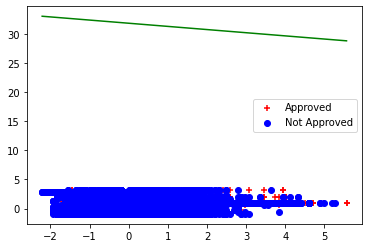

[0.0857415]
[0.08531673]
[0.08489287]
[0.08446988]
[0.08404775]
[0.08362648]
[0.08320604]
[0.08278642]
[0.08236761]
[0.08194959]


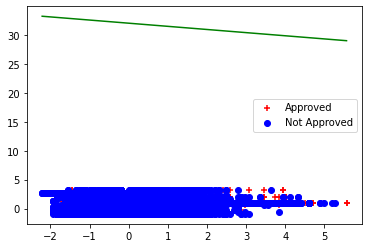

[0.08153235]
[0.08111587]
[0.08070015]
[0.08028516]
[0.07987089]
[0.07945734]
[0.07904449]
[0.07863233]
[0.07822085]
[0.07781002]


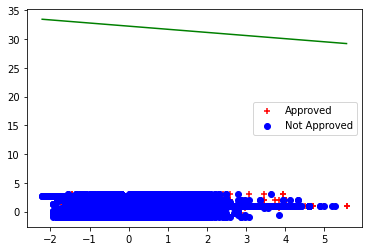

[0.07739985]
[0.07699032]
[0.07658142]
[0.07617314]
[0.07576546]
[0.07535838]
[0.07495189]
[0.07454597]
[0.07414061]
[0.07373581]


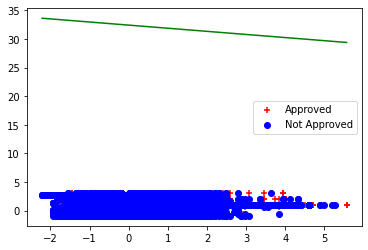

[0.07333156]
[0.07292784]
[0.07252465]
[0.07212198]
[0.07171981]
[0.07131814]
[0.07091696]
[0.07051626]
[0.07011603]
[0.06971626]


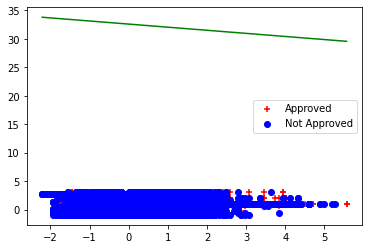

[0.06931695]
[0.06891809]
[0.06851966]
[0.06812167]
[0.0677241]
[0.06732694]
[0.06693019]
[0.06653384]
[0.06613788]
[0.06574231]


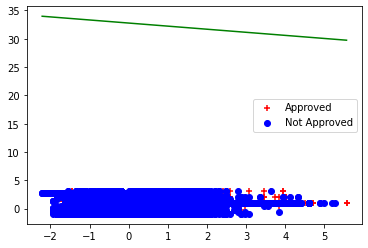

[0.06534711]
[0.06495229]
[0.06455783]
[0.06416372]
[0.06376997]
[0.06337656]
[0.06298349]
[0.06259076]
[0.06219834]
[0.06180625]


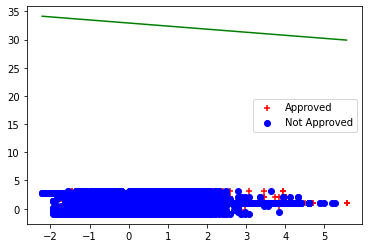

[0.06141446]
[0.06102299]
[0.06063181]
[0.06024094]
[0.05985035]
[0.05946004]
[0.05907001]
[0.05868026]
[0.05829077]
[0.05790155]


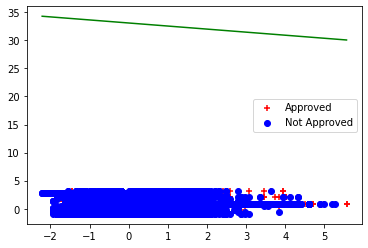

[0.05751258]
[0.05712387]
[0.0567354]
[0.05634718]
[0.05595919]
[0.05557143]
[0.0551839]
[0.0547966]
[0.05440951]
[0.05402264]


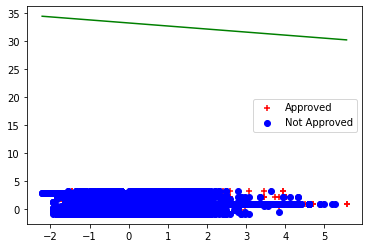

[0.05363598]
[0.05324953]
[0.05286327]
[0.05247721]
[0.05209135]
[0.05170567]
[0.05132018]
[0.05093487]
[0.05054973]
[0.05016477]


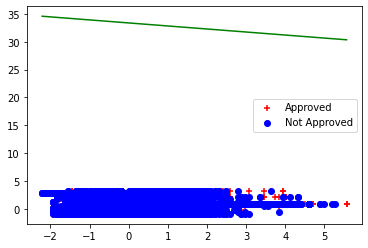

[0.04977998]
[0.04939535]
[0.04901089]
[0.04862658]
[0.04824243]
[0.04785843]
[0.04747457]
[0.04709086]
[0.04670729]


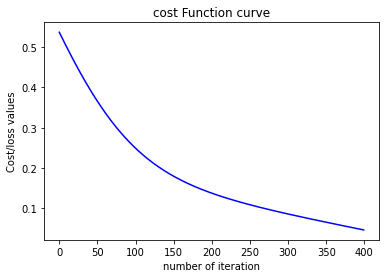

In [50]:
theta,costfunction=gradientDescent(X,Y,initial_theta,0.02,400)

[0.53697534]


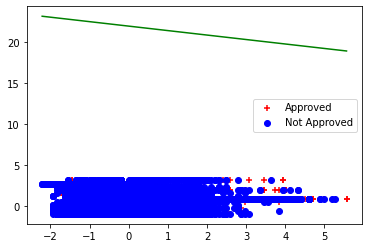

[0.53504261]
[0.53311313]
[0.53118693]
[0.52926406]
[0.52734456]
[0.52542847]
[0.52351585]
[0.52160673]
[0.51970115]
[0.51779916]


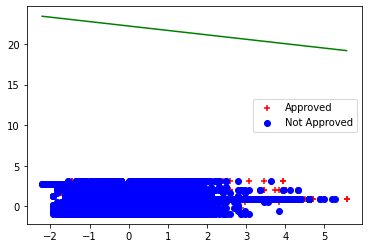

[0.5159008]
[0.51400611]
[0.51211513]
[0.51022791]
[0.50834448]
[0.50646488]
[0.50458916]
[0.50271735]
[0.5008495]
[0.49898564]


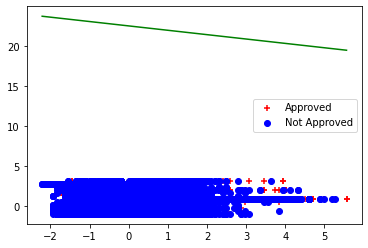

[0.49712581]
[0.49527005]
[0.4934184]
[0.4915709]
[0.48972758]
[0.48788849]
[0.48605365]
[0.4842231]
[0.48239689]
[0.48057504]


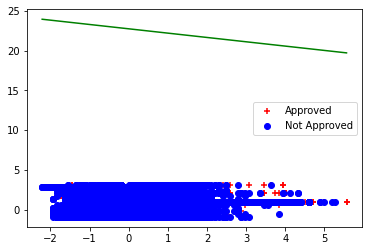

[0.47875759]
[0.47694458]
[0.47513604]
[0.473332]
[0.47153251]
[0.46973758]
[0.46794726]
[0.46616158]
[0.46438056]
[0.46260425]


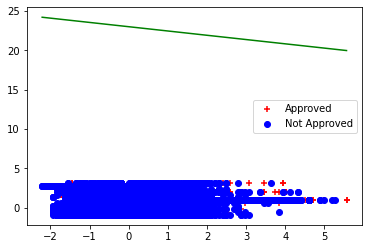

[0.46083267]
[0.45906586]
[0.45730384]
[0.45554664]
[0.4537943]
[0.45204684]
[0.45030429]
[0.44856669]
[0.44683406]
[0.44510642]


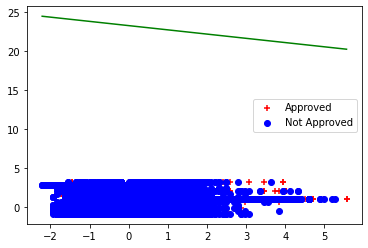

[0.4433838]
[0.44166624]
[0.43995375]
[0.43824637]
[0.43654411]
[0.43484701]
[0.43315509]
[0.43146837]
[0.42978688]
[0.42811064]


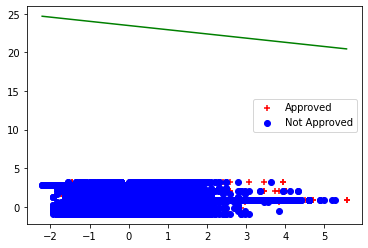

[0.42643966]
[0.42477399]
[0.42311363]
[0.42145861]
[0.41980895]
[0.41816467]
[0.41652579]
[0.41489233]
[0.41326431]
[0.41164175]


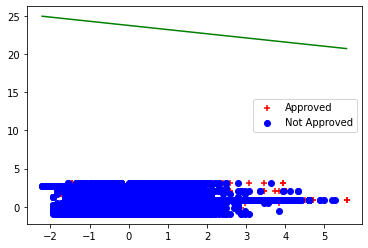

[0.41002466]
[0.40841307]
[0.406807]
[0.40520645]
[0.40361145]
[0.40202201]
[0.40043815]
[0.39885988]
[0.39728723]
[0.39572019]


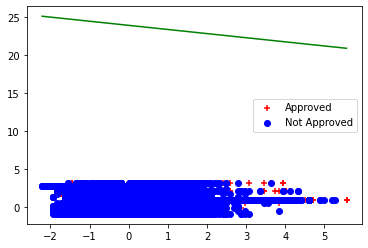

[0.39415879]
[0.39260305]
[0.39105296]
[0.38950855]
[0.38796983]
[0.38643681]
[0.38490951]
[0.38338792]
[0.38187207]
[0.38036196]


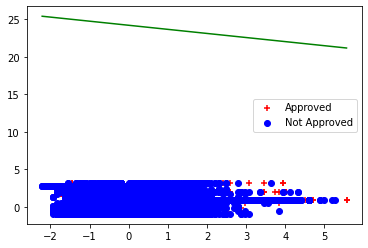

[0.3788576]
[0.377359]
[0.37586618]
[0.37437913]
[0.37289787]
[0.3714224]
[0.36995273]
[0.36848888]
[0.36703083]
[0.3655786]


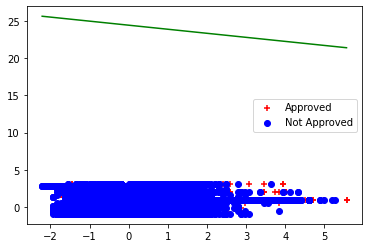

[0.3641322]
[0.36269163]
[0.36125689]
[0.35982799]
[0.35840493]
[0.35698772]
[0.35557635]
[0.35417084]
[0.35277118]
[0.35137737]


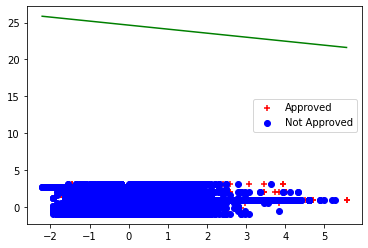

[0.34998941]
[0.34860732]
[0.34723108]
[0.34586069]
[0.34449617]
[0.3431375]
[0.34178468]
[0.34043772]
[0.33909661]
[0.33776134]


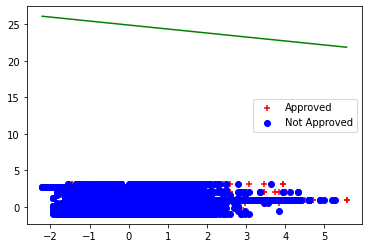

[0.33643193]
[0.33510836]
[0.33379063]
[0.33247874]
[0.33117268]
[0.32987245]
[0.32857805]
[0.32728946]
[0.32600669]
[0.32472972]


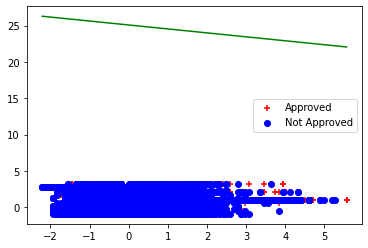

[0.32345856]
[0.3221932]
[0.32093362]
[0.31967983]
[0.31843181]
[0.31718956]
[0.31595307]
[0.31472233]
[0.31349734]
[0.31227808]


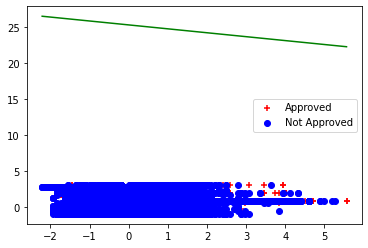

[0.31106454]
[0.30985672]
[0.3086546]
[0.30745818]
[0.30626745]
[0.30508239]
[0.30390299]
[0.30272925]
[0.30156115]
[0.30039868]


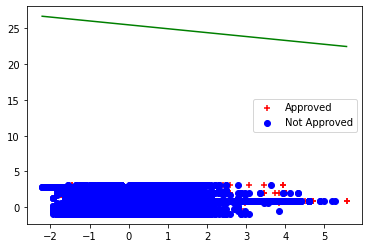

[0.29924183]
[0.29809058]
[0.29694493]
[0.29580486]
[0.29467035]
[0.2935414]
[0.29241799]
[0.29130011]
[0.29018774]
[0.28908087]


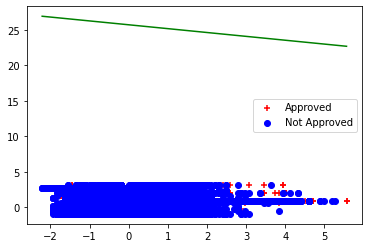

[0.28797949]
[0.28688358]
[0.28579312]
[0.28470811]
[0.28362852]
[0.28255434]
[0.28148556]
[0.28042215]
[0.27936411]
[0.27831142]


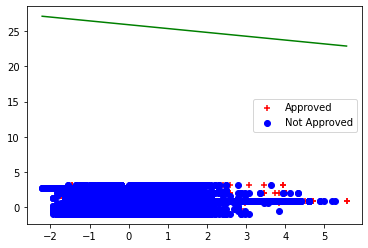

[0.27726405]
[0.276222]
[0.27518525]
[0.27415378]
[0.27312757]
[0.27210661]
[0.27109087]
[0.27008035]
[0.26907502]
[0.26807486]


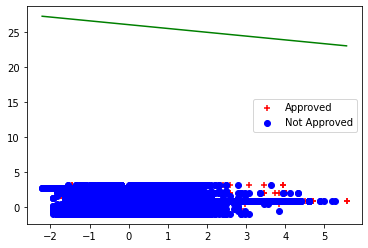

[0.26707987]
[0.26609001]
[0.26510527]
[0.26412564]
[0.26315109]
[0.2621816]
[0.26121716]
[0.26025775]
[0.25930335]
[0.25835393]


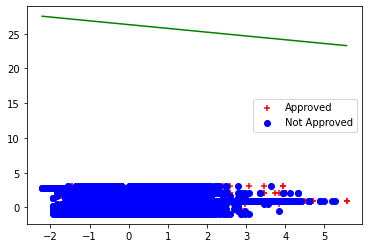

[0.25740949]
[0.25646999]
[0.25553543]
[0.25460577]
[0.25368101]
[0.25276112]
[0.25184607]
[0.25093586]
[0.25003046]
[0.24912985]


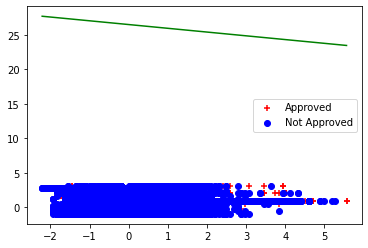

[0.24823401]
[0.24734292]
[0.24645656]
[0.24557491]
[0.24469794]
[0.24382564]
[0.24295799]
[0.24209496]
[0.24123654]
[0.2403827]


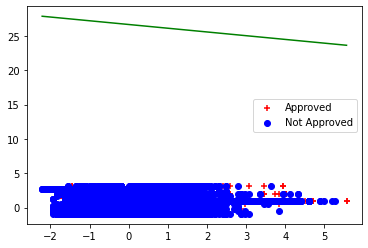

[0.23953342]
[0.23868868]
[0.23784847]
[0.23701275]
[0.2361815]
[0.23535472]
[0.23453237]
[0.23371443]
[0.23290088]
[0.23209171]


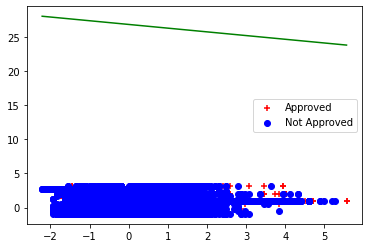

[0.23128688]
[0.23048638]
[0.22969018]
[0.22889827]
[0.22811062]
[0.22732721]
[0.22654803]
[0.22577303]
[0.22500222]
[0.22423556]


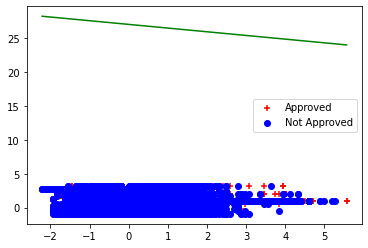

[0.22347303]
[0.22271461]
[0.22196028]
[0.22121002]
[0.2204638]
[0.21972161]
[0.21898341]
[0.2182492]
[0.21751895]
[0.21679264]


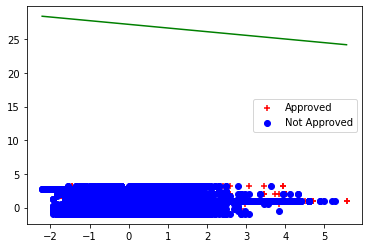

[0.21607024]
[0.21535173]
[0.2146371]
[0.21392631]
[0.21321936]
[0.21251621]
[0.21181685]
[0.21112125]
[0.21042939]
[0.20974126]


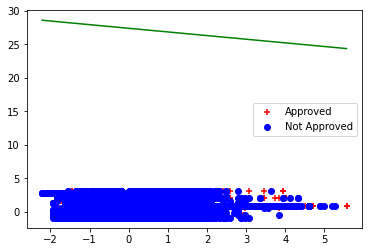

[0.20905682]
[0.20837607]
[0.20769897]
[0.2070255]
[0.20635565]
[0.2056894]
[0.20502671]
[0.20436758]
[0.20371197]
[0.20305987]


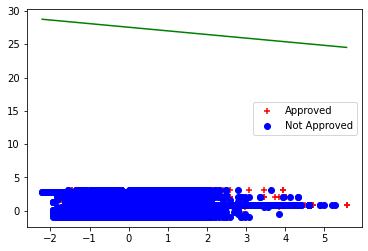

[0.20241126]
[0.20176612]
[0.20112442]
[0.20048615]
[0.19985127]
[0.19921978]
[0.19859166]
[0.19796687]
[0.1973454]
[0.19672723]


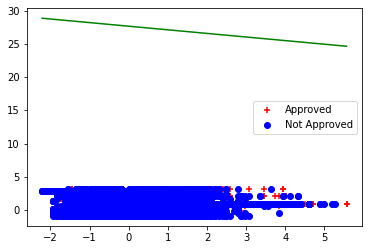

[0.19611234]
[0.19550071]
[0.19489232]
[0.19428715]
[0.19368517]
[0.19308637]
[0.19249073]
[0.19189822]
[0.19130883]
[0.19072253]


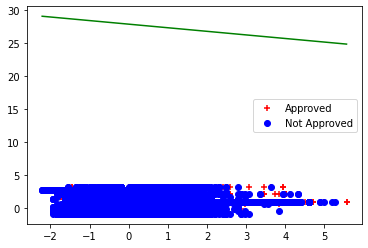

[0.19013932]
[0.18955915]
[0.18898203]
[0.18840792]
[0.18783681]
[0.18726868]
[0.18670351]
[0.18614127]
[0.18558196]
[0.18502554]


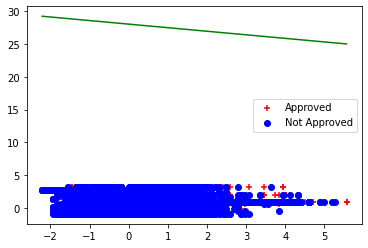

[0.184472]
[0.18392133]
[0.1833735]
[0.18282849]
[0.18228629]
[0.18174687]
[0.18121022]
[0.18067631]
[0.18014514]
[0.17961668]


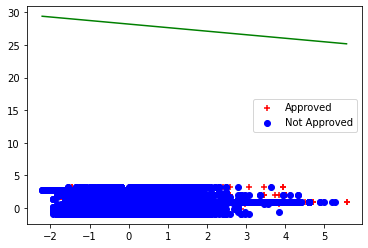

[0.17909091]
[0.17856781]
[0.17804737]
[0.17752956]
[0.17701438]
[0.17650179]
[0.17599179]
[0.17548436]
[0.17497947]
[0.17447711]


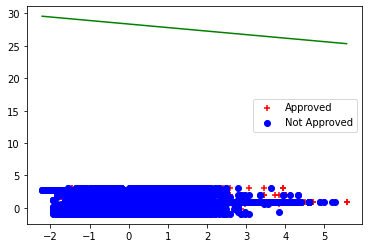

[0.17397726]
[0.17347991]
[0.17298503]
[0.17249261]
[0.17200264]
[0.17151509]
[0.17102994]
[0.17054719]
[0.17006681]
[0.16958879]


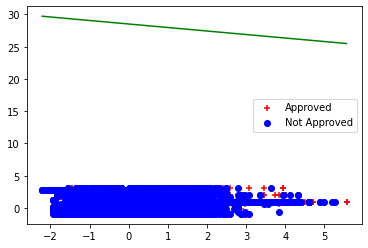

[0.1691131]
[0.16863974]
[0.16816869]
[0.16769992]
[0.16723343]
[0.16676919]
[0.1663072]
[0.16584743]
[0.16538987]
[0.16493449]


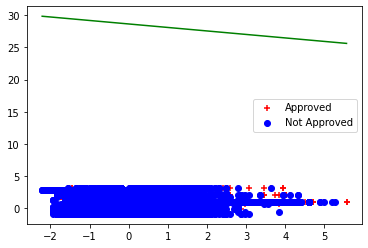

[0.1644813]
[0.16403026]
[0.16358137]
[0.16313461]
[0.16268996]
[0.16224741]
[0.16180694]
[0.16136853]
[0.16093218]
[0.16049787]


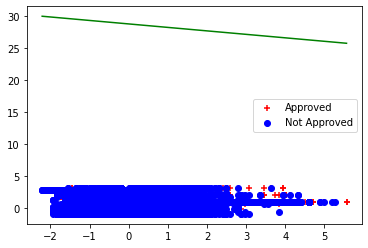

[0.16006557]
[0.15963528]
[0.15920698]
[0.15878066]
[0.1583563]
[0.15793388]
[0.1575134]
[0.15709483]
[0.15667817]
[0.1562634]


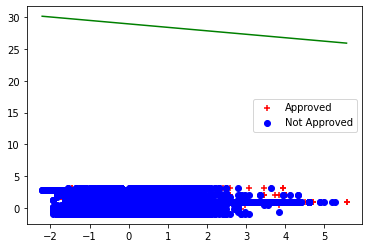

[0.1558505]
[0.15543946]
[0.15503027]
[0.15462291]
[0.15421737]
[0.15381363]
[0.15341169]
[0.15301152]
[0.15261311]
[0.15221646]


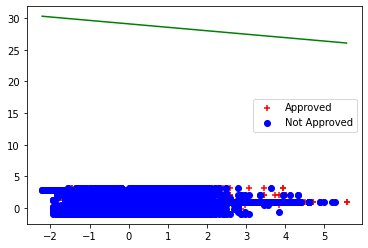

[0.15182154]
[0.15142834]
[0.15103686]
[0.15064707]
[0.15025897]
[0.14987254]
[0.14948776]
[0.14910463]
[0.14872313]
[0.14834326]


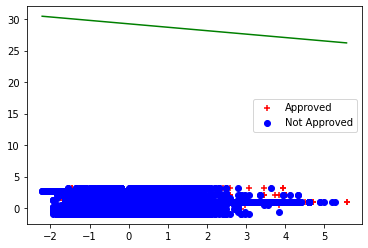

[0.14796499]
[0.14758831]
[0.14721322]
[0.1468397]
[0.14646773]
[0.14609731]
[0.14572843]
[0.14536106]
[0.14499521]
[0.14463085]


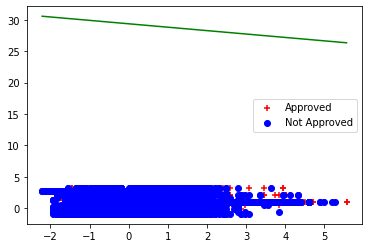

[0.14426798]
[0.14390658]
[0.14354665]
[0.14318817]
[0.14283113]
[0.14247551]
[0.14212132]
[0.14176852]
[0.14141713]
[0.14106711]


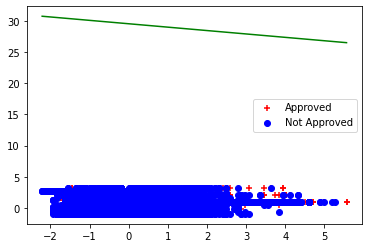

[0.14071847]
[0.1403712]
[0.14002527]
[0.13968068]
[0.13933742]
[0.13899548]
[0.13865485]
[0.13831552]
[0.13797747]
[0.1376407]


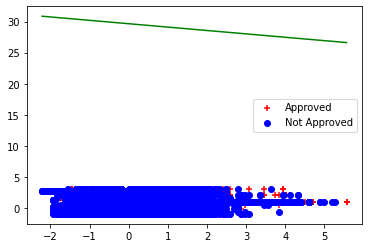

[0.1373052]
[0.13697096]
[0.13663796]
[0.1363062]
[0.13597566]
[0.13564634]
[0.13531823]
[0.13499132]
[0.13466559]
[0.13434104]


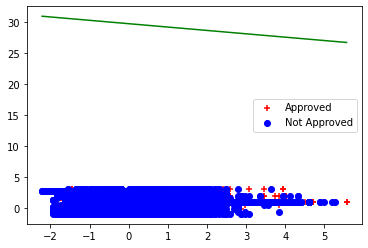

[0.13401766]
[0.13369544]
[0.13337437]
[0.13305444]
[0.13273564]
[0.13241796]
[0.13210139]
[0.13178593]
[0.13147156]
[0.13115828]


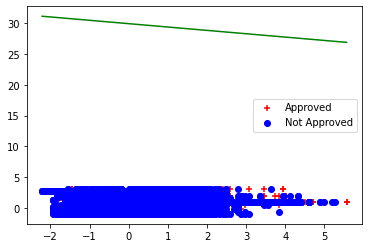

[0.13084607]
[0.13053493]
[0.13022485]
[0.12991582]
[0.12960784]
[0.12930088]
[0.12899496]
[0.12869005]
[0.12838614]
[0.12808324]


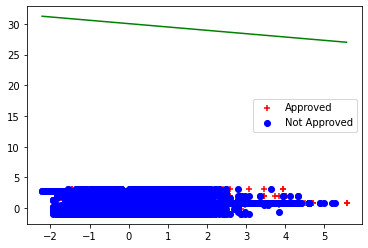

[0.12778133]
[0.1274804]
[0.12718045]
[0.12688146]
[0.12658344]
[0.12628636]
[0.12599023]
[0.12569504]
[0.12540077]
[0.12510743]


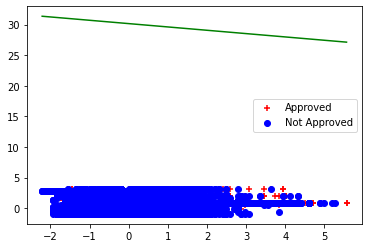

[0.12481499]
[0.12452347]
[0.12423284]
[0.1239431]
[0.12365424]
[0.12336626]
[0.12307915]
[0.1227929]
[0.1225075]
[0.12222295]


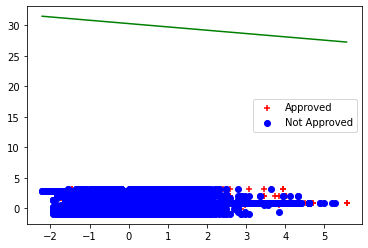

[0.12193924]
[0.12165636]
[0.12137431]
[0.12109308]
[0.12081266]
[0.12053305]
[0.12025423]
[0.11997621]
[0.11969897]
[0.11942251]


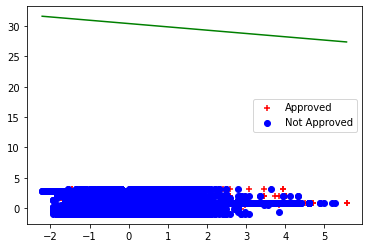

[0.11914682]
[0.1188719]
[0.11859774]
[0.11832433]
[0.11805167]
[0.11777975]
[0.11750856]
[0.1172381]
[0.11696837]
[0.11669935]


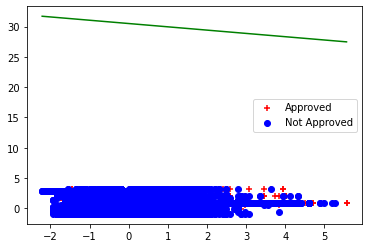

[0.11643104]
[0.11616343]
[0.11589652]
[0.11563031]
[0.11536478]
[0.11509993]
[0.11483575]
[0.11457225]
[0.11430941]
[0.11404722]


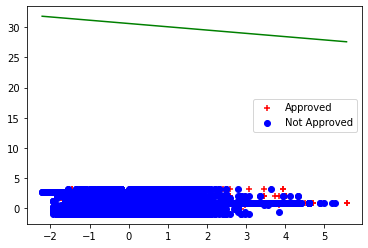

[0.11378569]
[0.11352481]
[0.11326456]
[0.11300496]
[0.11274598]
[0.11248763]
[0.1122299]
[0.11197278]
[0.11171627]
[0.11146037]


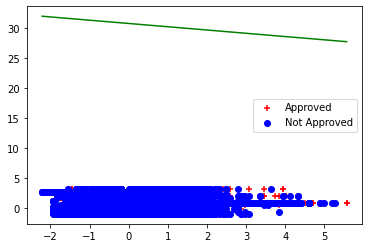

[0.11120507]
[0.11095036]
[0.11069624]
[0.1104427]
[0.11018975]
[0.10993736]
[0.10968555]
[0.1094343]
[0.10918361]


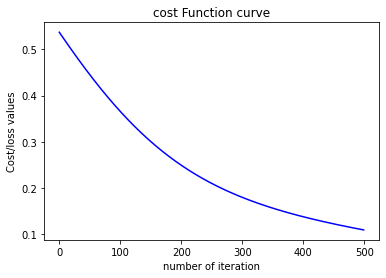

In [31]:
theta,costfunction=gradientDescent(X,Y,initial_theta,0.01,500)